In [6]:
# Predicting Stock Prices Using Regression Analysis

# Standard data imports
import pandas as pd
import numpy as np

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn metrics, functions and models
from sklearn import metrics


In [8]:
# Load CSV dataset (replace 'GOOG.csv' with your dataset path)
df = pd.read_csv('/content/GOOG - GOOG.csv')

# Show first 5 rows
df.head()


,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,########,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0,1
1,GOOG,########,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0,1
2,GOOG,########,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0,1
3,GOOG,########,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0,1
4,GOOG,########,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0,1


In [9]:
# Shape of dataset
df.shape


(1258, 14)

In [10]:
# Drop unnecessary columns
df = df.drop(columns=[
    'symbol', 'adjClose', 'adjHigh', 'adjLow',
    'adjOpen', 'adjVolume', 'divCash', 'splitFactor'
], axis=1)

df.head()


,date,close,high,low,open,volume
0,########,718.27,722.47,713.1200,716.48,1306065
1,########,718.92,722.98,717.3100,719.00,1214517
2,########,710.36,716.65,703.2600,714.91,1982471
3,########,691.72,708.82,688.4515,708.65,3402357
4,########,693.71,702.48,693.4100,698.77,2082538


In [11]:
# Check duplicates
df.duplicated().sum()


np.int64(0)

In [12]:
# Check null values
df.isnull().values.any()


np.False_

In [13]:
# DataFrame info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   close   1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   open    1258 non-null   float64
 5   volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


In [14]:
# Descriptive statistics
df.describe()


,close,high,low,open,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1216.317067,1227.430935,1204.176430,1215.260778,1.601590e+06
std,383.333358,387.570874,378.777095,382.446995,6.960172e+05
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06


In [16]:
# Correlation matrix
df.drop(columns=['date']).corr()

,close,high,low,open,volume
close,1.000000,0.999528,0.999586,0.999083,-0.025574
high,0.999528,1.000000,0.999354,0.999575,-0.012470
low,0.999586,0.999354,1.000000,0.999499,-0.035184
open,0.999083,0.999575,0.999499,1.000000,-0.021381
volume,-0.025574,-0.012470,-0.035184,-0.021381,1.000000


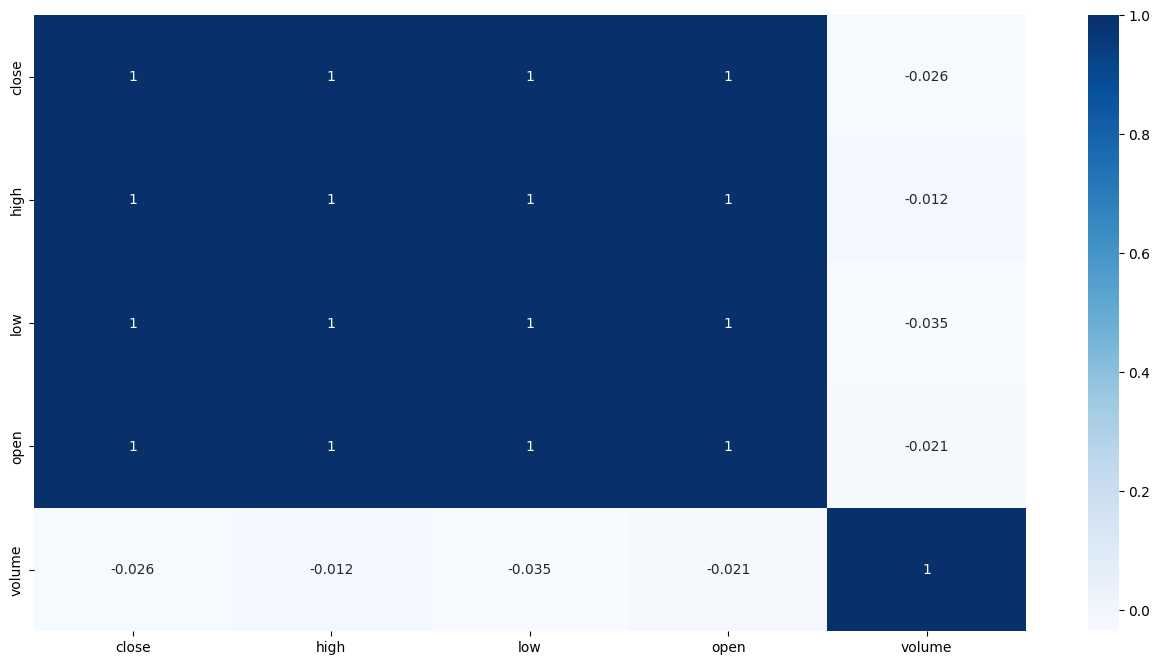

In [18]:
# Heatmap
plt.figure(figsize=(16,8))
sns.heatmap(df.drop(columns=['date']).corr(), cmap="Blues", annot=True)
plt.show()

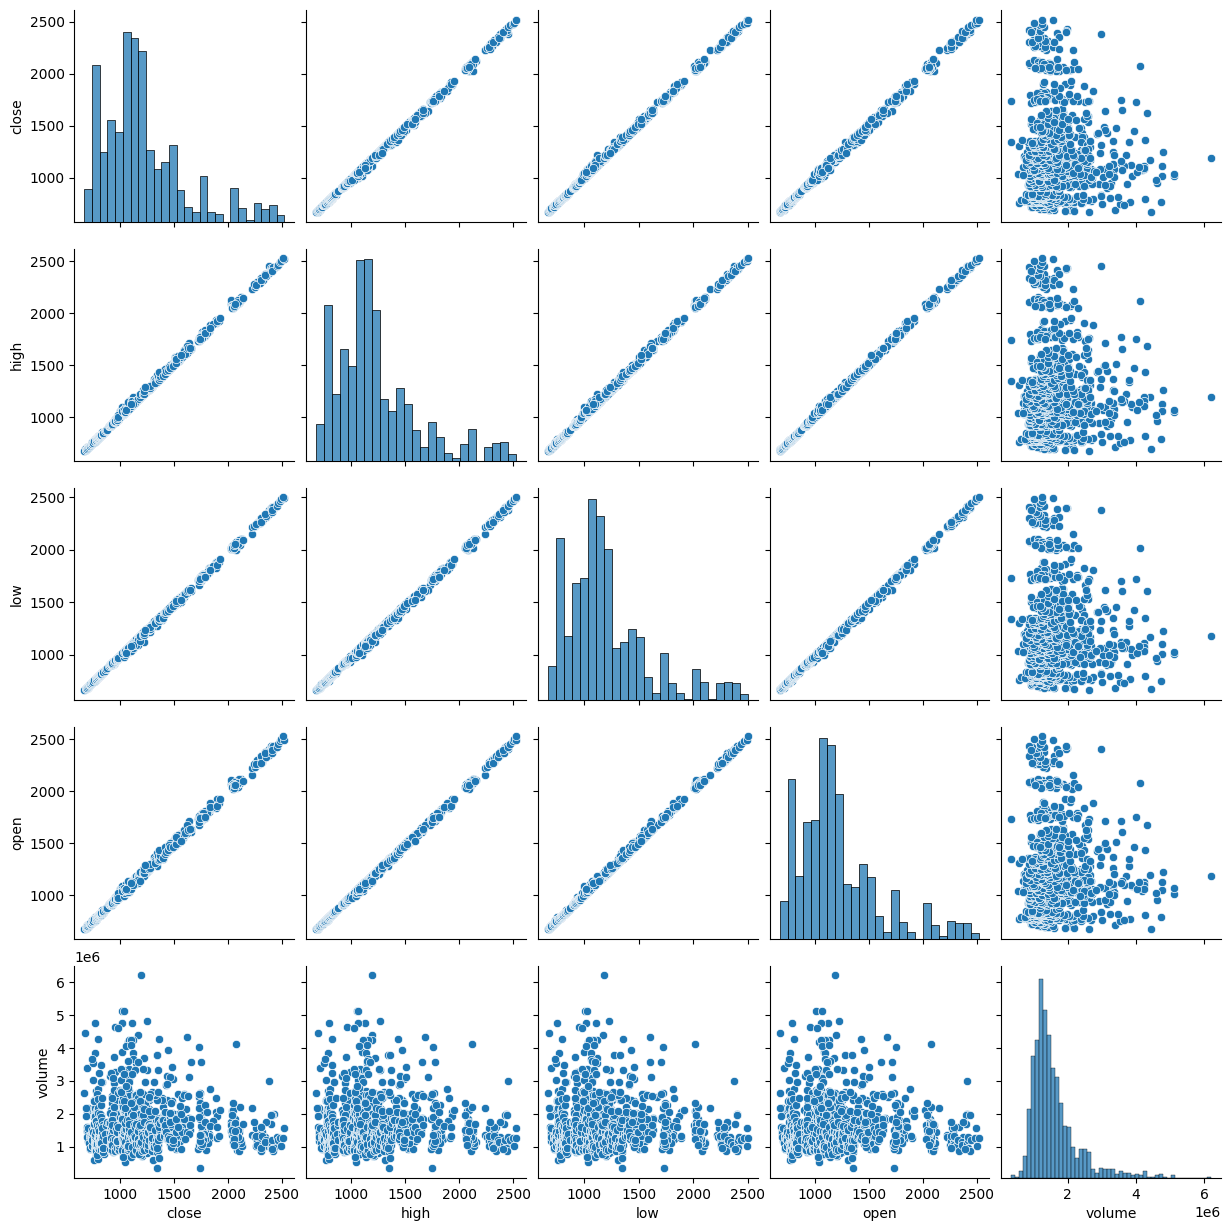

In [19]:
# Pairplot
sns.pairplot(df)


<Axes: >

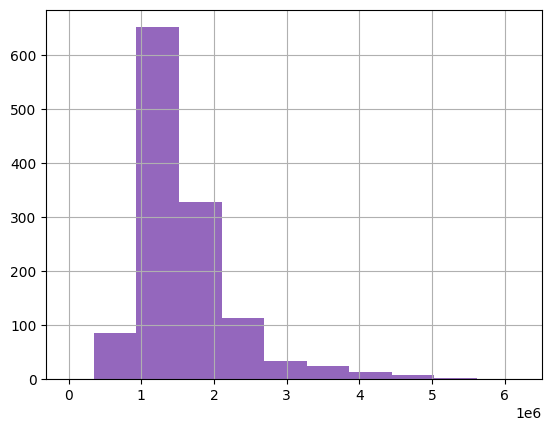

In [20]:
# Histograms
df['open'].hist()
df['high'].hist()
df['low'].hist()
df['close'].hist()
df['volume'].hist()


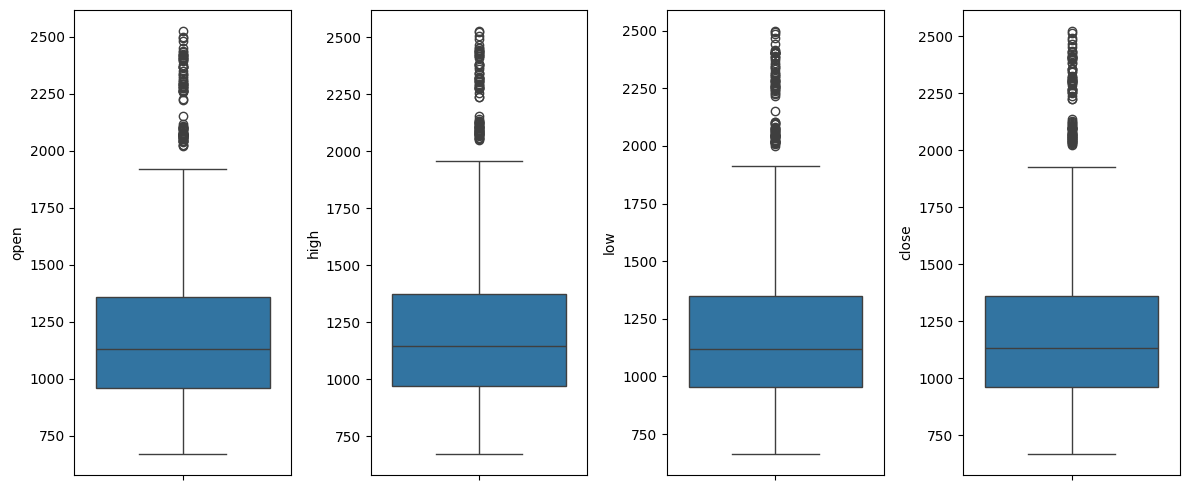

In [21]:
# Boxplots
f, axes = plt.subplots(1, 4, figsize=(12,5))
sns.boxplot(y='open', data=df, ax=axes[0])
sns.boxplot(y='high', data=df, ax=axes[1])
sns.boxplot(y='low', data=df, ax=axes[2])
sns.boxplot(y='close', data=df, ax=axes[3])
plt.tight_layout()


In [22]:
# Candlestick plot
import plotly.graph_objects as go

figure = go.Figure(data=[go.Candlestick(
    x=df["date"], open=df["open"], high=df["high"],
    low=df["low"], close=df["close"]
)])
figure.update_layout(title="Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()


In [23]:
# Independent & dependent variables
X = df[['open', 'high', 'low', 'volume']].values
y = df['close'].values

# Split (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('Train:', X_train.shape)
print('Test:', X_test.shape)


Train: (1006, 4)
Test: (252, 4)


In [24]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Train model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict
y_pred = regressor.predict(X_test)


In [25]:
# Coefficients & intercept
print("Model Coefficients:", regressor.coef_)
print("Model Intercept:", regressor.intercept_)


Model Coefficients: [-5.54784360e-01  7.77461486e-01  7.76834243e-01 -4.55054752e-07]
Model Intercept: 1.4776019862770227


In [26]:
# Prediction DataFrame
dfr = pd.DataFrame({'Actual_Price': y_test, 'Predicted_Price': y_pred})
dfr.head()


,Actual_Price,Predicted_Price
0,695.94,697.302935
1,1084.99,1090.146796
2,769.54,772.628263
3,1349.33,1345.790923
4,843.25,841.900955


In [27]:
# Stats
dfr.describe()


,Actual_Price,Predicted_Price
count,252.00000,252.000000
mean,1239.92381,1239.673290
std,378.69218,379.364629
min,675.22000,675.546303
25%,1028.45250,1021.774676
50%,1163.42500,1158.541486
75%,1428.65000,1429.116929
max,2411.56000,2419.701573


<Axes: ylabel='Count'>

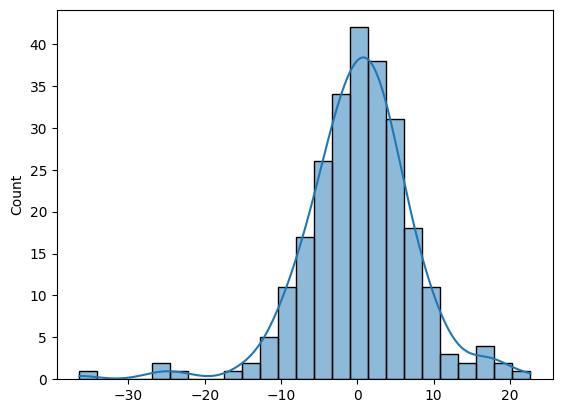

In [28]:
# Residuals
residual = y_test - y_pred
sns.histplot(residual, kde=True)


In [29]:
# P-value
import scipy.stats
p_value = scipy.stats.norm.sf(abs(1.67))
print('p value is :', p_value)


p value is : 0.04745968180294733


In [30]:
# OLS regression
results3 = sm.OLS(y_test, X_test).fit()
results3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.090e+06
Date:                Sun, 17 Aug 2025   Prob (F-statistic):                        0.00
Time:                        15:40:06   Log-Likelihood:                         -850.12
No. Observations:                 252   AIC:                                      1708.
Df Residuals:                     248   BIC:                                      1722.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5442      0.046    -11.952      0.000      -0.634      -0.455
x2             0.6887      0.042     16.487      0.000       0.606       0.771
x3             0.8558      0.043     19.965      0.000       0.771       0.940
x4          1.274e-06   5.72e-07      2.226      0.027    1.47e-07     2.4e-06
==============================================================================
Omnibus:                       20.727   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.797
Skew:                          -0.184   Prob(JB):                     1.90e-15
Kurtosis:                       5.514   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# Regression confidence
print("Linear regression confidence:", regressor.score(X_test, y_test))


Linear regression confidence: 0.9996411863468339


In [32]:
# Error metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 5.170018928527545
Mean Squared Error: 51.25247167592226
Root Mean Squared Error: 7.159083158891385


In [33]:
# Accuracy
x2 = abs(y_pred - y_test)
y2 = 100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print('Accuracy:', round(accuracy, 2), '%.')


Accuracy: 99.59 %.


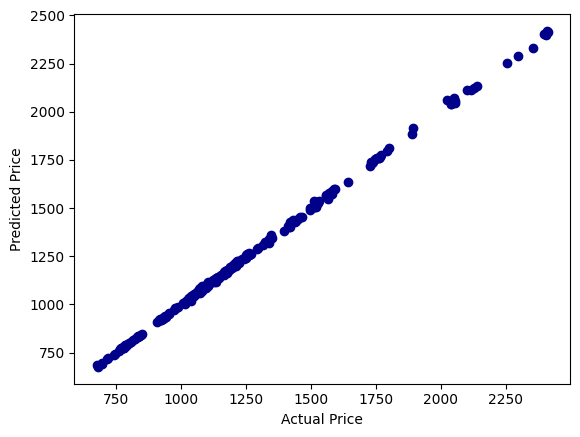

In [34]:
# Scatter Plot
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color='Darkblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()


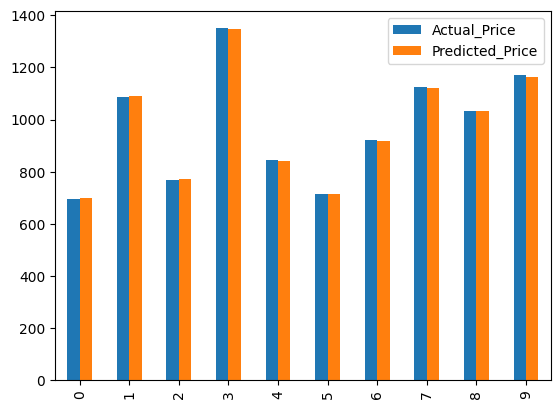

In [35]:
# Bar Graph (first 10 values)
dfr.head(10).plot(kind='bar')
plt.show()
